In [1]:
#Author: S M Abdullah Ferdous
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split


In [2]:
#First we going to read the concrete dataset in from xls file
df = pd.read_excel ('Concrete_Data.xls') 
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
#the coulmn names looks too lengthy.we can make the small and simple
df.columns = ['cement_comp','blast_furnance','fly_ash',
                     'water','superplasticizer','coarse_aggregate','fine_aggregate','age','compressive_strength']

In [4]:
#observe the dataset with shorter column names
df.head()

,cement_comp,blast_furnance,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
#checking the dimention of the datrset
df.shape

(1030, 9)

In [6]:
#database information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement_comp             1030 non-null float64
blast_furnance          1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
superplasticizer        1030 non-null float64
coarse_aggregate        1030 non-null float64
fine_aggregate          1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#checking for any missing values
df.describe().T
#we can see no missing values for any columns

,count,mean,std,min,25%,50%,75%,max
cement_comp,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
blast_furnance,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
compressive_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [8]:
#we can also check for null values like this
df.isnull().sum()

cement_comp             0
blast_furnance          0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


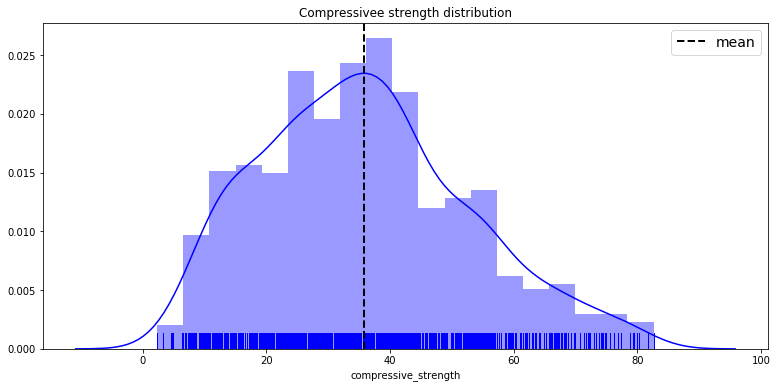

In [9]:
#we can check the distribution of the target label
plt.figure(figsize=(13,6))
sns.distplot(df["compressive_strength"],color="b",rug=True)
plt.axvline(df["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

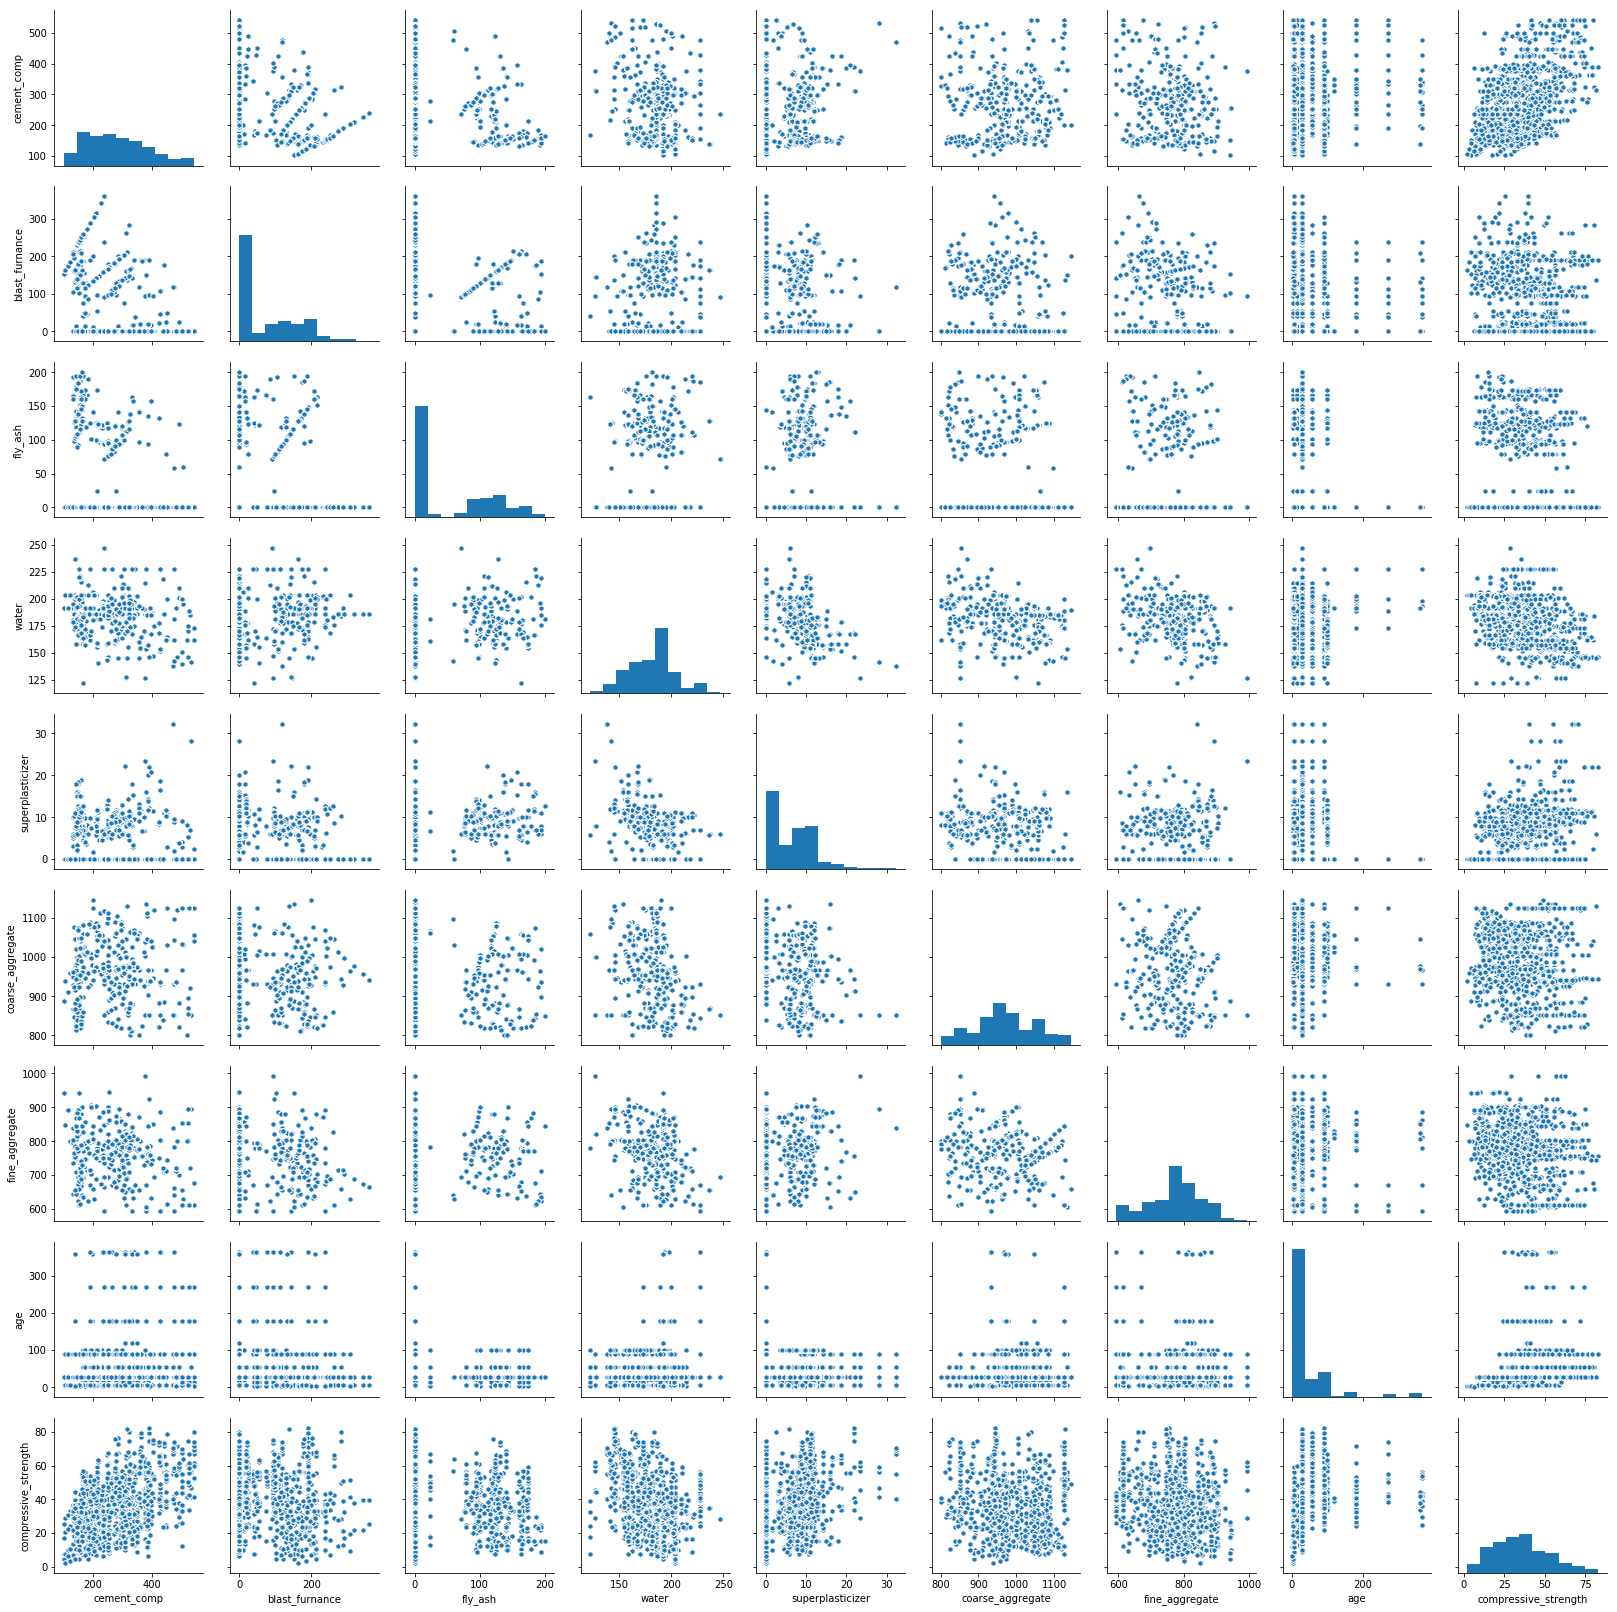

In [10]:
#we can see the relationship between the variables
sns.pairplot(df,markers="h")
plt.show()

In [11]:
#we can calcuate the ouliers for the dataset
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

,No. of Outliers,Percentage Outliers
cement_comp,0,0.00
blast_furnance,2,0.19
fly_ash,0,0.00
water,9,0.87
superplasticizer,10,0.97
coarse_aggregate,0,0.00
fine_aggregate,5,0.49
age,59,5.73
compressive_strength,4,0.39


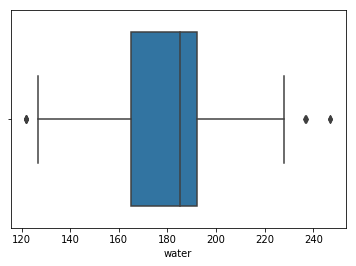

In [12]:

import seaborn as sns
sns.boxplot(x=df['water'])


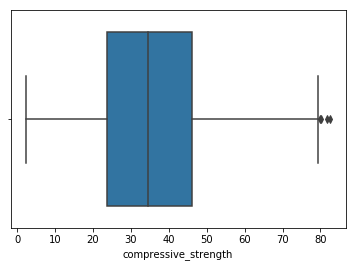

In [13]:

sns.boxplot(x=df['compressive_strength'])

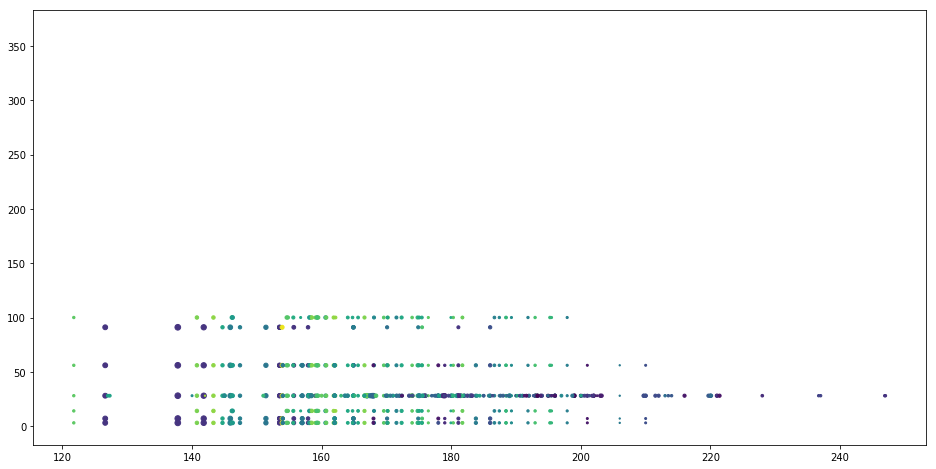

In [14]:
#we can also visualise ouliers like this
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['water'], df['age'], df['superplasticizer'],df['coarse_aggregate'])
plt.show()

In [15]:
#using z score to find and remove outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[2.47791782 0.85688631 0.84713204 ... 1.21765845 0.27973311 2.64519215]
 [2.47791782 0.85688631 0.84713204 ... 1.21765845 0.27973311 1.5612771 ]
 [0.49144303 0.79553263 0.84713204 ... 2.24091255 3.55306569 0.26660766]
 ...
 [1.2700575  0.75958527 0.85066095 ... 0.08012724 0.27973311 0.7259282 ]
 [1.16857975 1.3080724  0.84713204 ... 0.19118775 0.27973311 0.18264932]
 [0.19401043 0.30850389 0.37696733 ... 0.15072887 0.27973311 0.20461667]]


In [16]:
#we can define thereshhold to see the outliers more clearly
threshold = 3
print(np.where(z > 3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [17]:
#removeinbg the otliers
df = df[(z < 3).all(axis=1)]

In [18]:
#cheaking the dimention after removeing the outliers
df.shape

(981, 9)

In [19]:
#test ans train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],
                                                    df[[df.columns[-1]]],
                                                    test_size = .3,
                                                    random_state = 1)


In [20]:
#applying liniar regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Score: ',lr.score(x_test,y_test))
y_pred_lrtr=lr.predict(x_train)
y_pred_lrte=lr.predict(x_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Score:  0.684830742060365
Train R2 score:  0.7126609705112297
Test R2 score:  0.684830742060365
